In [7]:
import pandas as pd
import gensim
from gensim import corpora
from pprint import pprint
import spacy
import re     
import numpy as np
# Plotting tools
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
import pickle
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from Preprocess import Preprocess
from Viz import Viz
from LDA import LDA
import tmtoolkit.topicmod.tm_gensim
from tmtoolkit.topicmod.tm_gensim import evaluate_topic_models
from tmtoolkit.topicmod.evaluate import results_by_parameter

[nltk_data] Downloading package punkt to /Users/shruti/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/shruti/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [8]:
def evaluate(data, top_l, top_h, step, texts):

    var_params = [{'num_topics': k, 'alpha': 1/k} for k in range(top_l, top_h, step)]
    const_params = {'iterations': 1000, 'eta': 0.1,'random_state': 20191122}  # to make results reproducible}
    eval_results = evaluate_topic_models(data, 
                                         varying_parameters=var_params,
                                         constant_parameters=const_params,
                                         return_models=True, coherence_gensim_texts=texts,
                                        metrics = tmtoolkit.topicmod.tm_gensim.DEFAULT_METRICS)
    
    eval_results_by_topics = results_by_parameter(eval_results, 'num_topics')

    from tmtoolkit.topicmod.visualize import plot_eval_results

    plot_eval_results(eval_results_by_topics)
    
    return eval_results_by_topics

['research', 'project', 'datum', 'model', 'develop', 'new', 'use', 'student', 'include', 'problem', 'algorithm', 'application', 'human', 'work', 'learn', 'provide', 'information', 'analysis', 'result', 'science', 'method', 'computational', 'tool', 'approach', 'image', 'computer', 'study', 'development', 'design', 'field', 'researcher', 'technique', 'support', 'social', 'community', 'language', 'user', 'network', 'set', 'visual', 'different', 'goal', 'advance', 'area', 'improve', 'impact', 'pi', 'workshop', 'process', 'enable']


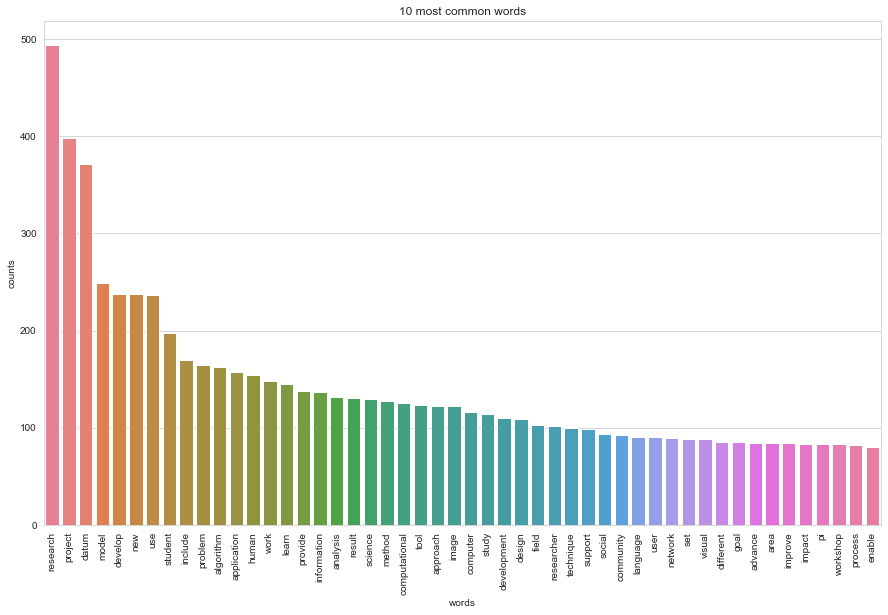

In [2]:
f1 = '2010/CSE.csv'
pd.read_csv(f1, encoding ='latin1')
p1= Preprocess(f1)
lem1 = p1.clean_lemmatize(True, 50)

In [3]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
custom_stop = ['project', 'research', 'datum', 'use', 'learn', 'develop', 'model', 'new', 'student', 'application', 
              'algorithm', 'machine', 'provide', 'method', 'include', 'problem', 'science', 'information', 
              'technology', 'work', 'design', 'tool', 'analysis', 'technique', 'study', 'approach', 'support', 'also', 
              'result', 'development', 'improve', 'advance', 'learning', 'field', 'make', 'propose', 'area', 'enable', 
               'program', 'process', 'large', 'system', 'well', 'many']

stop_words = stop_words + custom_stop
id_1, corpus1, stop1 = p1.create_corpus(lem1, stop_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shruti/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
file = open('Pickled_Data/CSE_2010_data.pkl','wb')
pickle.dump(id_1, file)
pickle.dump(corpus1, file)
pickle.dump(stop1, file)

/Users/shruti/opt/anaconda3/lib/python3.7/site-packages/tmtoolkit/topicmod/visualize.py:561: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig.subplots_adjust(**subplots_adjust_kwargs)


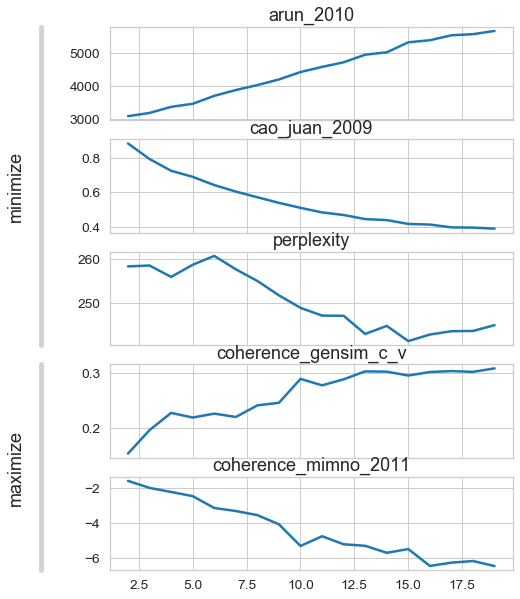

In [9]:
results1 = evaluate((id_1, corpus1), 2, 20, 1, stop1)

In [10]:
best_tm = [m for k, m in results1 if k == 7][0]['model']
best_tm.num_topics, best_tm.alpha, best_tm.eta 

(7, array([0.14285715, 0.14285715, 0.14285715, 0.14285715, 0.14285715,
        0.14285715, 0.14285715], dtype=float32), array([0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1], dtype=float32))

In [12]:
model_CSE = LDA(id_1, corpus1, 7, stop1, best_tm)


Coherence Score:  0.22049647191523286


7


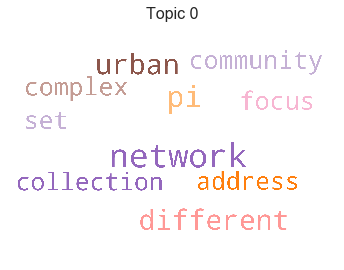

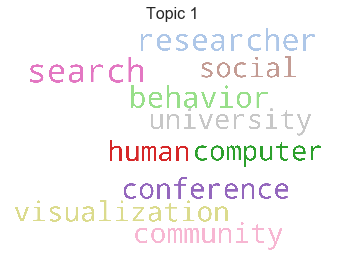

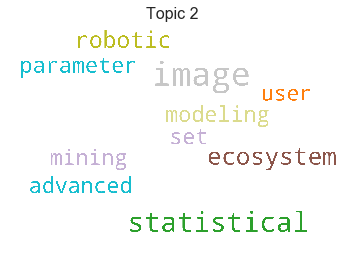

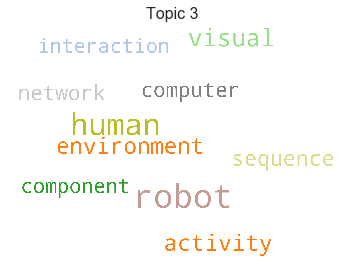

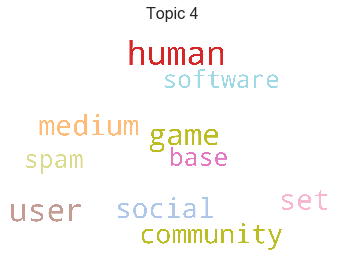

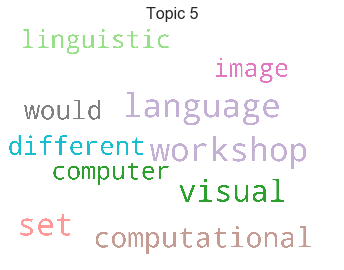

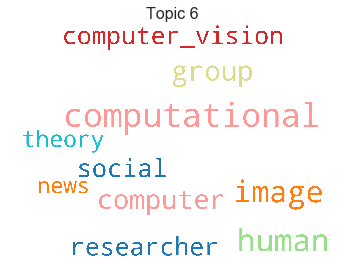

[(0,
  [('network', 0.0071452563),
   ('pi', 0.005499159),
   ('urban', 0.0051329187),
   ('different', 0.0050118132),
   ('focus', 0.004029563),
   ('complex', 0.003977725),
   ('community', 0.0039431555),
   ('set', 0.0039242003),
   ('collection', 0.0038996148),
   ('address', 0.003869731)]),
 (1,
  [('search', 0.006273755),
   ('researcher', 0.0052090273),
   ('behavior', 0.0049262936),
   ('conference', 0.0045017106),
   ('community', 0.004425135),
   ('human', 0.0043978575),
   ('visualization', 0.00439589),
   ('social', 0.0043205353),
   ('university', 0.0042982977),
   ('computer', 0.0042950106)]),
 (2,
  [('image', 0.010900926),
   ('statistical', 0.0073262653),
   ('ecosystem', 0.0054285224),
   ('robotic', 0.0049773366),
   ('modeling', 0.004465503),
   ('parameter', 0.0044651884),
   ('advanced', 0.004414948),
   ('set', 0.0043550725),
   ('mining', 0.0043479144),
   ('user', 0.004306049)]),
 (3,
  [('robot', 0.01056188),
   ('human', 0.008664479),
   ('visual', 0.00524965

In [13]:
model_CSE.topic_wordcloud(10, plot=True)

In [14]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(model_CSE.model, corpus1, dictionary=model_CSE.model.id2word)

/Users/shruti/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [ ]:
pyLDAvis.save_html(vis, 'Visualization/CSE_2010_model.html')
vis

In [ ]:
file = open('Pickled_models/CSE_2010.pkl','wb')
pickle.dump(best_tm, file)